In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from read_results import read_varnames
varnames = read_varnames("small_strato_f90/small_strato_Parameters.f90")[0:5]
print(len(varnames), varnames)

5 ['O1D', 'O', 'O3', 'NO', 'NO2']


In [3]:
df_init = pd.Series(data=1e-8, index=varnames)

In [4]:
df_init.values[:] = np.array([9.906E+01,
                              6.624E+08,
                              5.326E+11,
                              8.725E+08,
                              2.240E+08])

In [5]:
df_init

O1D    9.906000e+01
O      6.624000e+08
O3     5.326000e+11
NO     8.725000e+08
NO2    2.240000e+08
dtype: float64

In [6]:
import small_strato_f90.kpp4py as kpp4py

In [7]:
%%time
y_history = kpp4py.forward(df_init.values, 1000)
y_history.shape

CPU times: user 23.6 ms, sys: 445 µs, total: 24 ms
Wall time: 24.2 ms


In [8]:
df_history = pd.DataFrame(y_history.T, columns=varnames+['SUN'])
df_history.index.name = 'time'
df_history.head()

,O1D,O,O3,NO,NO2,SUN
time,,,,,,
0,99.653109,6.714930e+08,5.377002e+11,9.433265e+08,1.531735e+08,0.999997
1,100.575566,6.776442e+08,5.427272e+11,9.425255e+08,1.539745e+08,0.999951
2,101.457679,6.835613e+08,5.477042e+11,9.417147e+08,1.547853e+08,0.999753
3,102.260402,6.890269e+08,5.526266e+11,9.408647e+08,1.556353e+08,0.999220
4,102.927735,6.937286e+08,5.574854e+11,9.399339e+08,1.565661e+08,0.998097


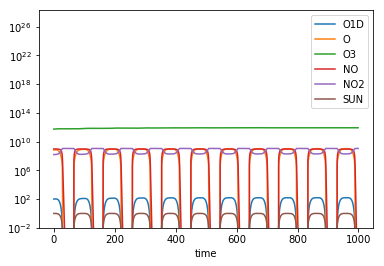

In [9]:
df_history.plot(y=None, ylim=[1e-2, None], logy=True)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
StandardScaler(copy=False).fit_transform(df_history.values);

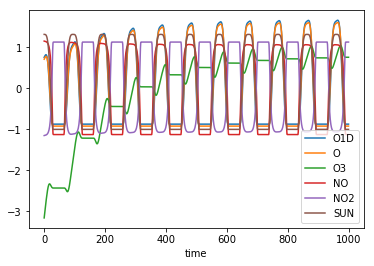

In [12]:
df_history.plot()